<a href="https://colab.research.google.com/github/shayaan-1/Data-Analysis-on-loans-dataset/blob/main/loanDataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [3]:
from ast import increment_lineno
#1. Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. For better plotting
%matplotlib inline
sns.set(style='whitegrid')

**Loading Dataset**

In [5]:
df = pd.read_csv('/content/train.csv')
print("Dataframe shape: ",df.shape)
df.head()

Dataframe shape:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**1. Data Quality Assesment**

1.1. Check for missing values

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values/len(df))*100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


Insight: The result shows an empty DataFrame, which means **there are no missing values in any column** of the dataset. All entries are complete, and thus, **no data imputation or handling of nulls is required** at this stage.


1.2. Check for duplicates

In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


1.3. Checking unique values

In [8]:
for col in df.columns:
  unique_count = df[col].unique()
  print(f"{col}: {unique_count} unique values")

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] unique values
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] unique values
marital: ['married' 'single' 'divorced'] unique values
education: ['tertiary' 'secondary' 'unknown' 'primary'] unique values
default: ['no' 'yes'] unique values
balance: [ 2143    29     2 ...  8205 14204 16353] unique values
housing: ['yes' 'no'] unique values
loan: ['no' 'yes'] unique values
contact: ['unknown' 'cellular' 'telephone'] unique values
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] unique values
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] unique values
duration: [ 2

1.4. Identify column types

In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


1.5. Basic outlier detection

In [10]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

age: 487 outliers (1.1%)
balance: 4729 outliers (10.5%)
day: 0 outliers (0.0%)
duration: 3235 outliers (7.2%)
campaign: 3064 outliers (6.8%)
pdays: 8257 outliers (18.3%)
previous: 8257 outliers (18.3%)


**Inference:** - **Highest outlier proportions** are in `pdays` and `previous` (18.3%), followed by `balance` (10.5%), indicating **highly skewed distributions**.
- `balance`, `duration`, and `campaign` also show notable outliers (6–10%), which may reflect **real-world extremes** (e.g., long calls, high balance) rather than errors.
- `age` is very clean (<2% outliers), and `day` has none, both are well-behaved.

**2. Exploratory Data Analysis**

2.1 Univariate Analysis

2.1.1. Summary statistics for numeric columns

In [11]:
df[numeric_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Inference:** The dataset has 45,211 customers with key insights:

**Age:** Well-distributed (avg 41 years), no outliers.

**Balance:** Highly skewed, most have low balances, but a few very high values (up to 102k).

**Day:** Evenly spread across the month.

**Duration:** Wide variation; longest calls may be outliers.

**Campaign:** Most contacted 1–3 times, some up to 63 times.

**pdays & Previous:** Most values are -1 or 0 indicating no prior contact for majority.

Key Note: pdays, previous, and duration need careful handling due to skewness and potential data leakage.

2.2.2 Create Distribution Plots for numeric variables

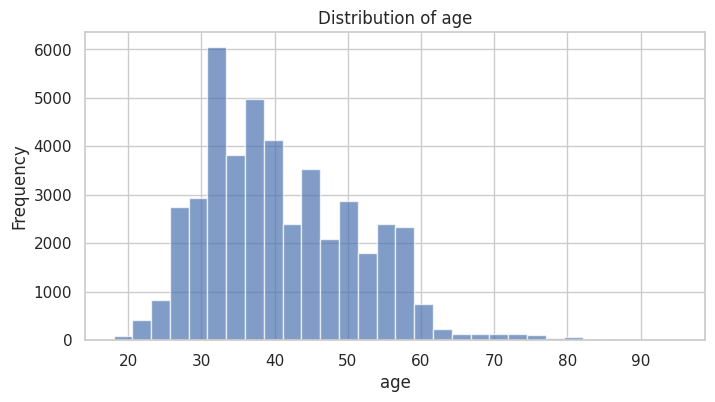

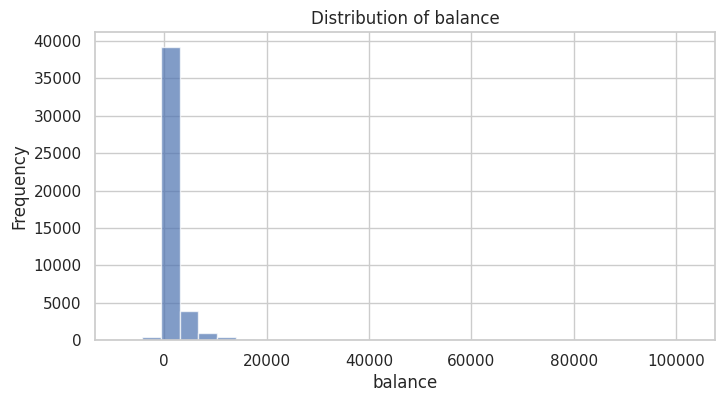

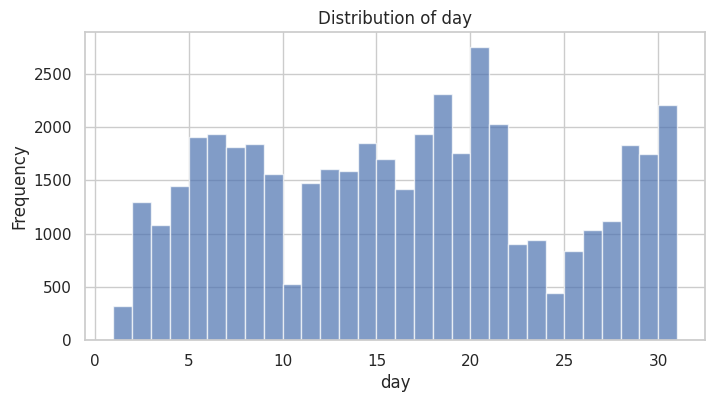

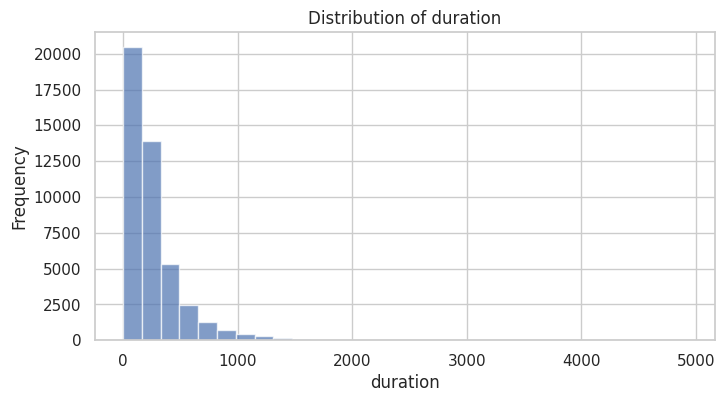

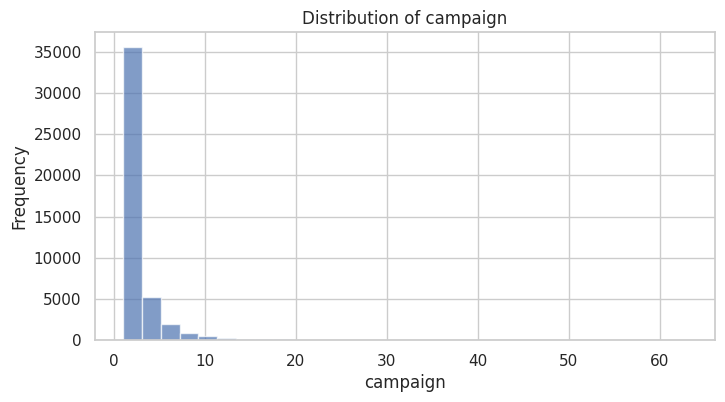

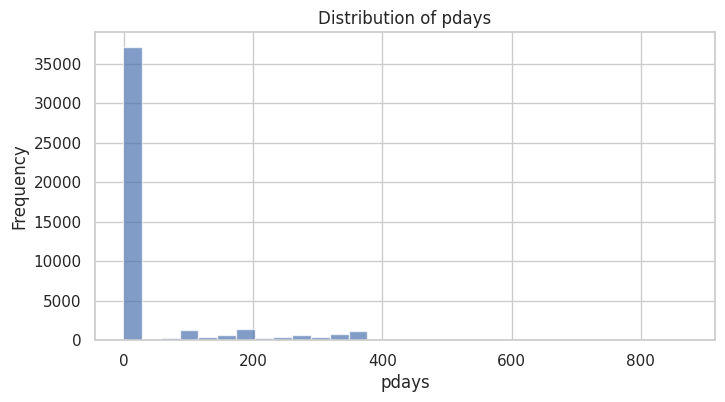

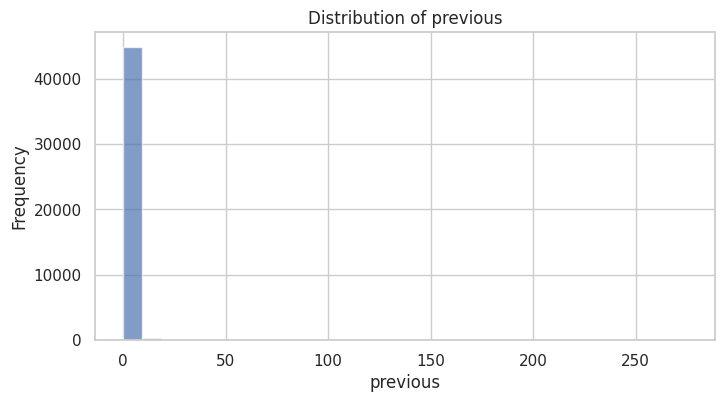

In [12]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

2.2.3 Distribution plots for categorical variables


job value counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


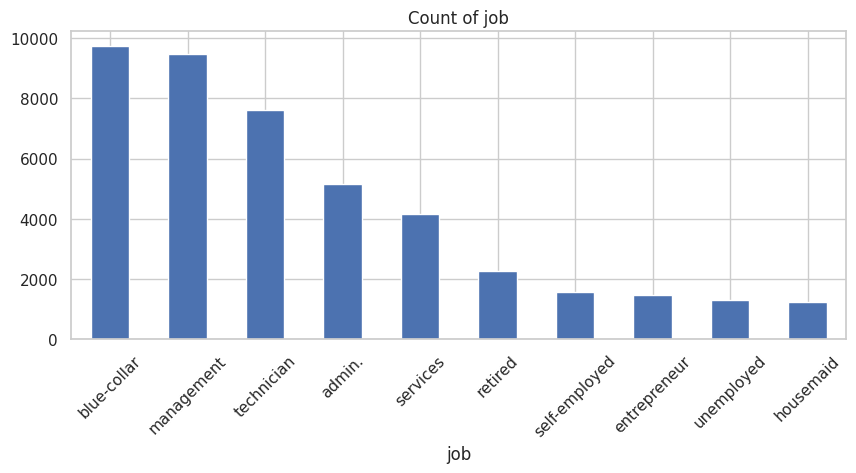


marital value counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


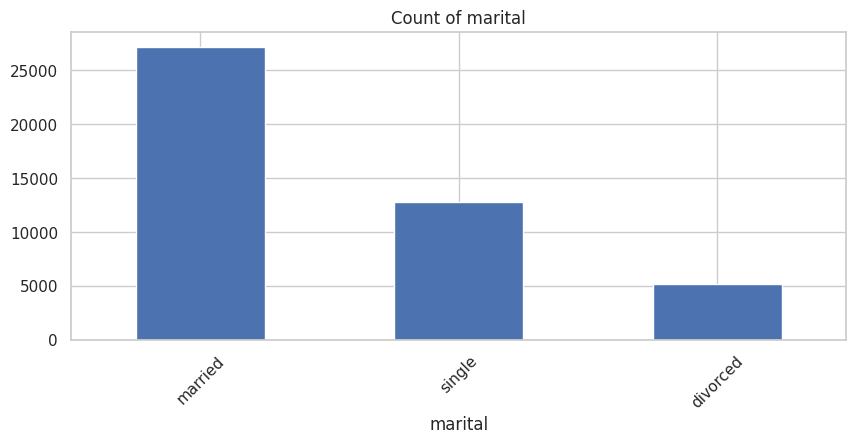


education value counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


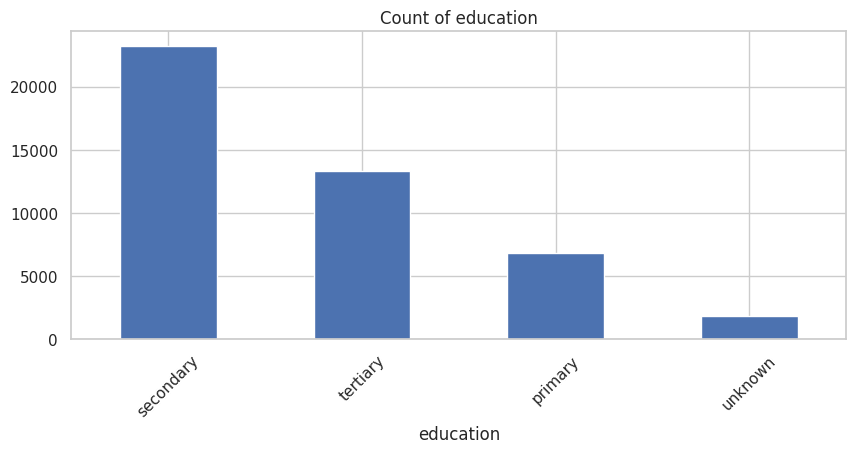


default value counts:
default
no     44396
yes      815
Name: count, dtype: int64


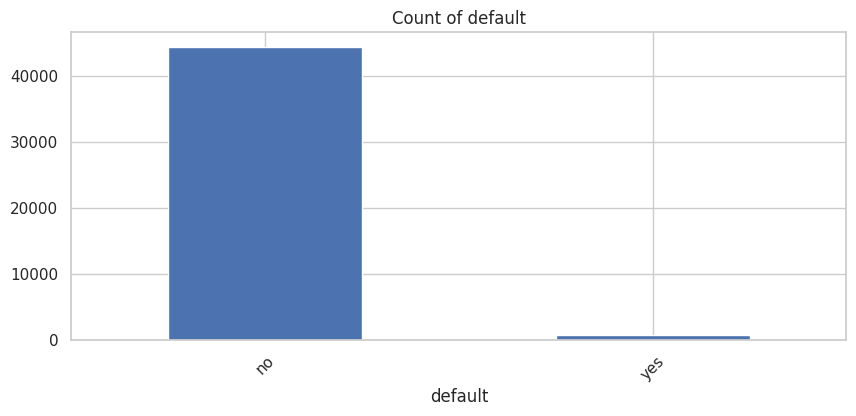


housing value counts:
housing
yes    25130
no     20081
Name: count, dtype: int64


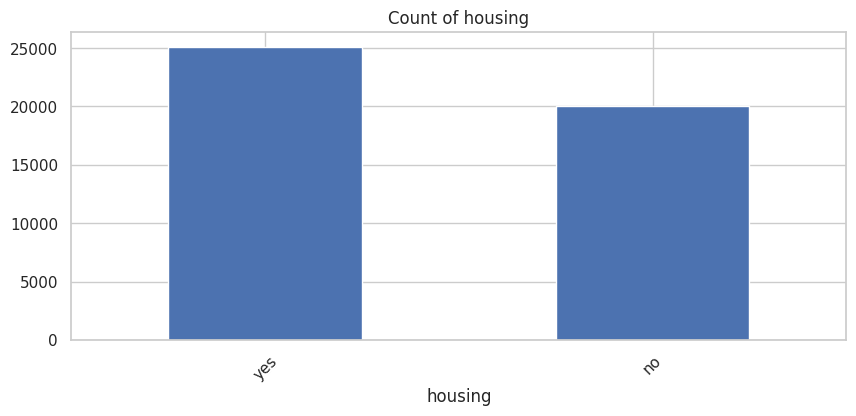


loan value counts:
loan
no     37967
yes     7244
Name: count, dtype: int64


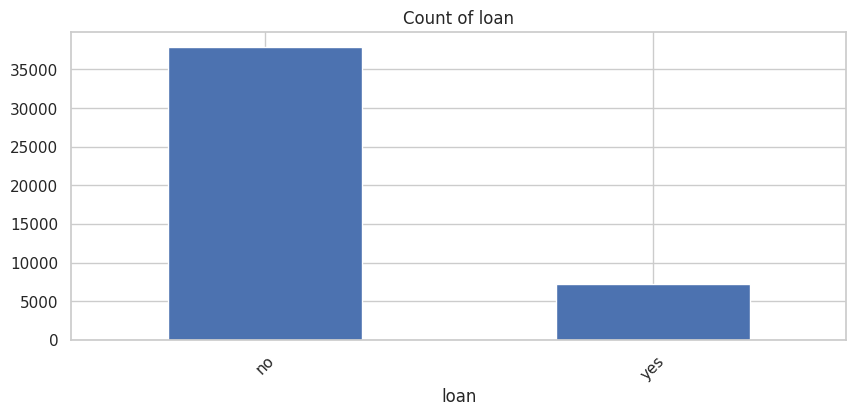


contact value counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


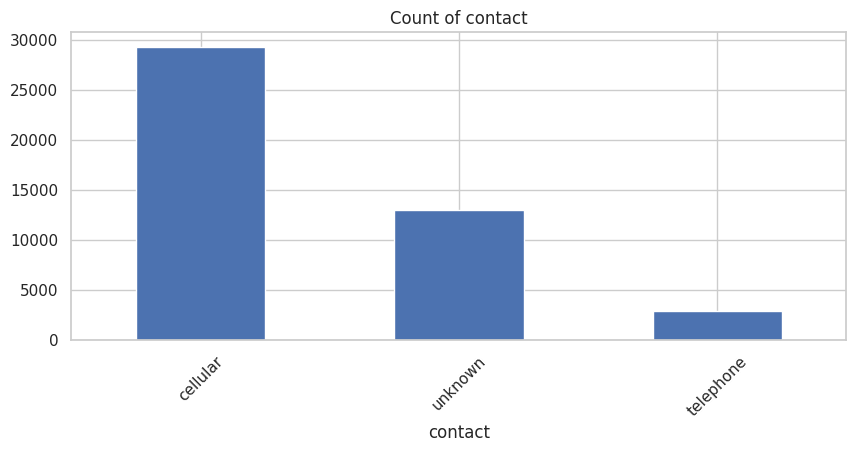


month value counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


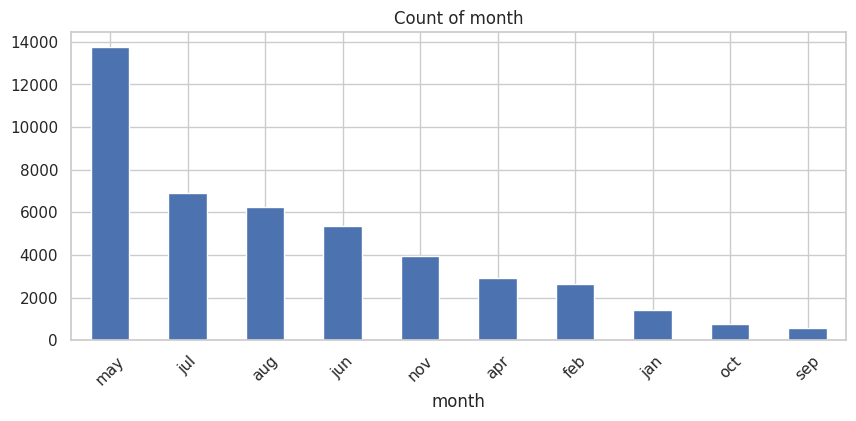


poutcome value counts:
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


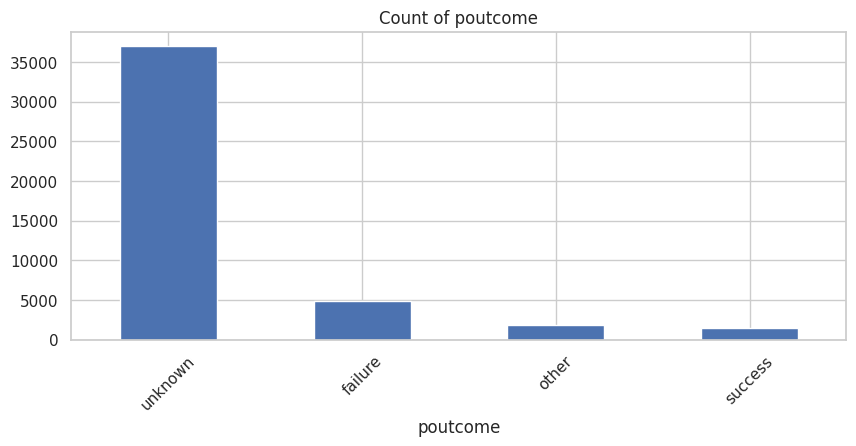


y value counts:
y
no     39922
yes     5289
Name: count, dtype: int64


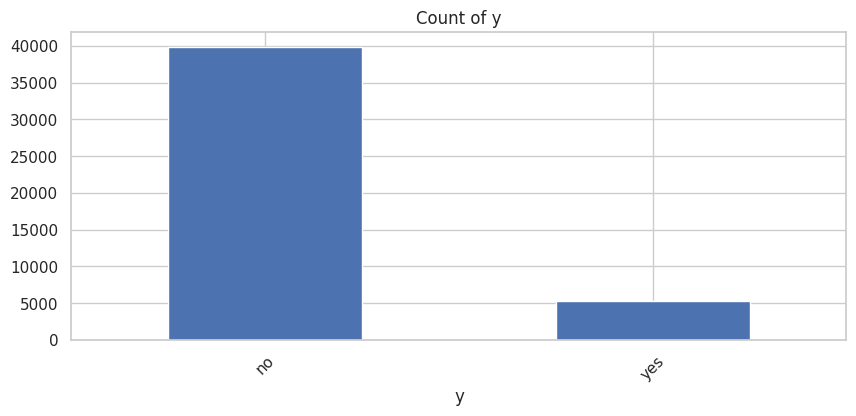

In [13]:
# Value counts for categorical variables
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

    # Bar plot
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

2.2 Bivariate Analysis

2.2.1 Correlation Analysis

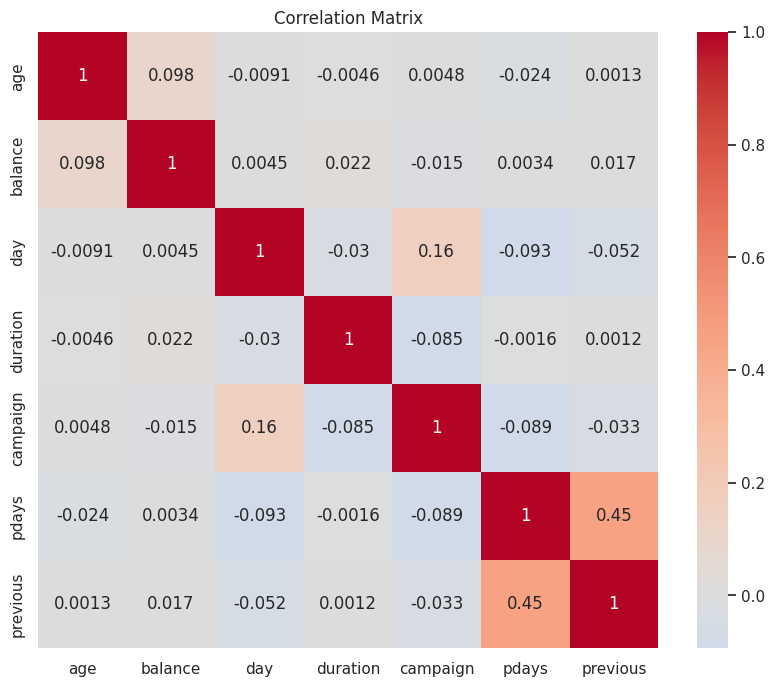

In [14]:
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

2.2.2 Scatter plots

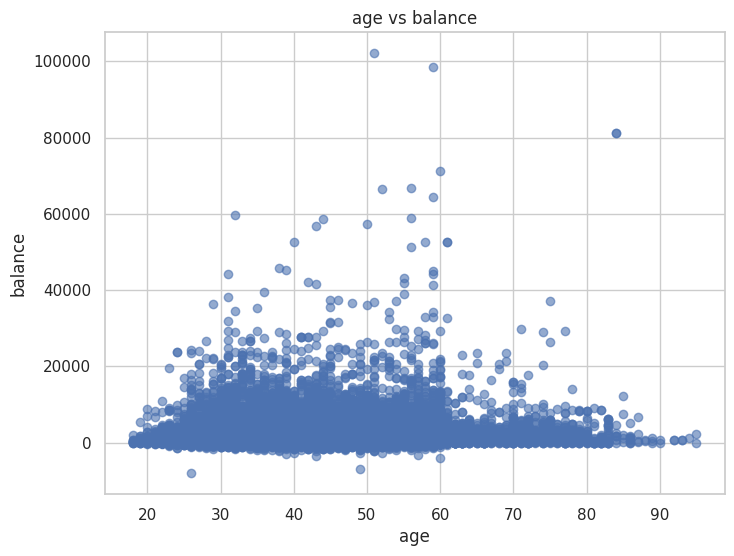

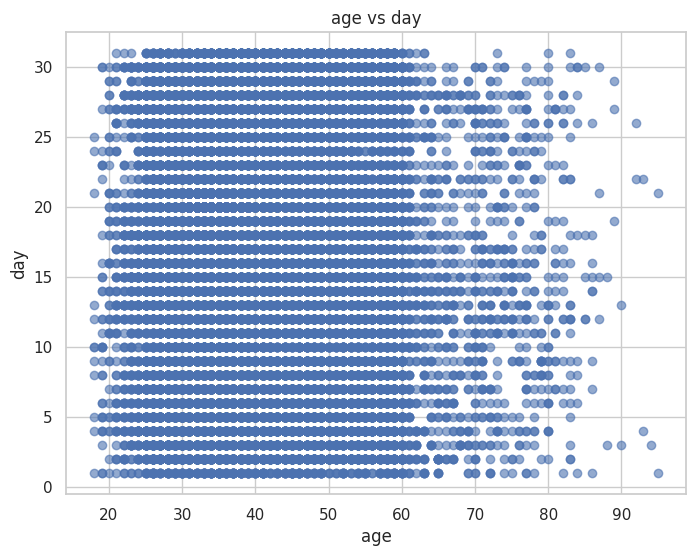

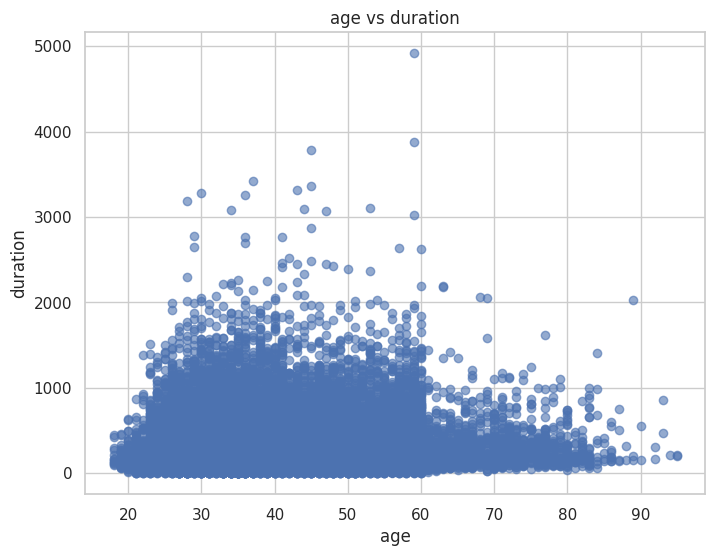

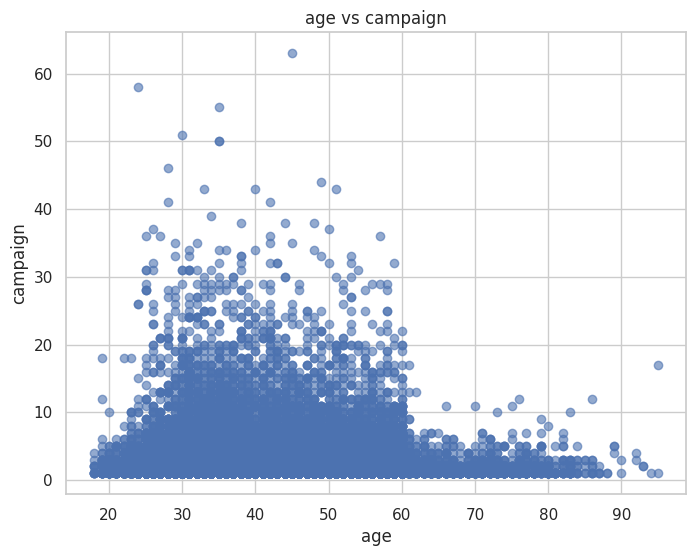

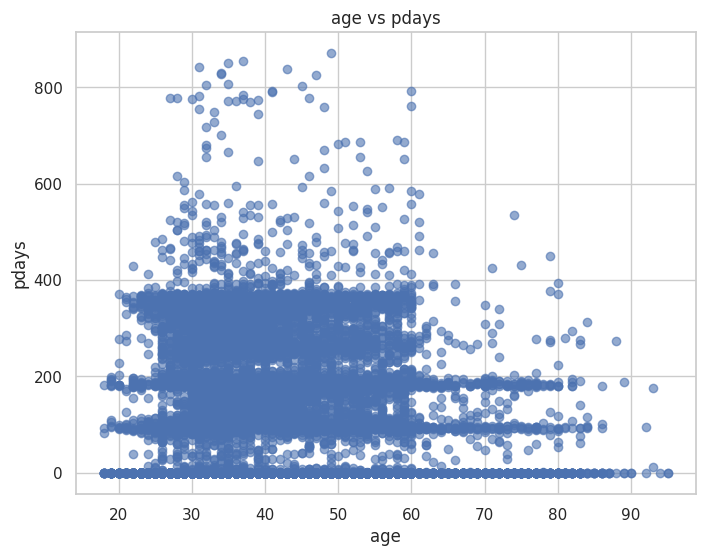

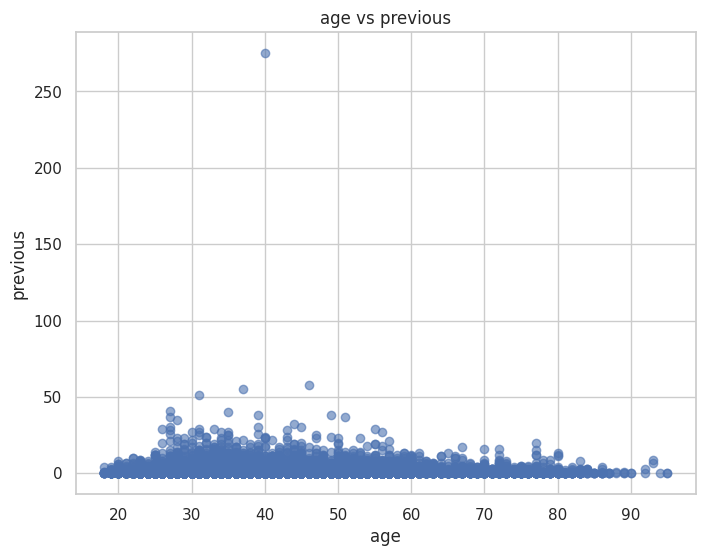

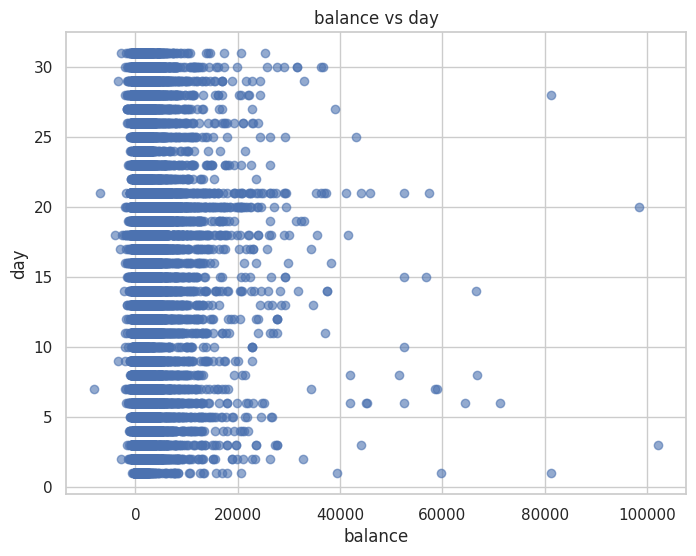

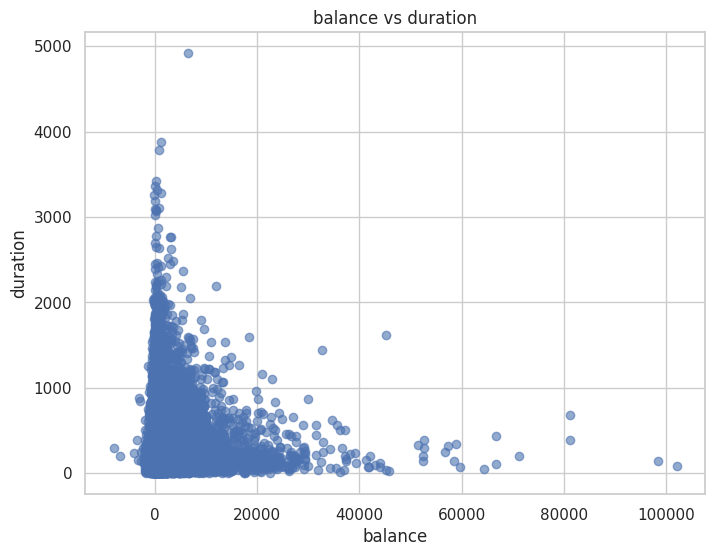

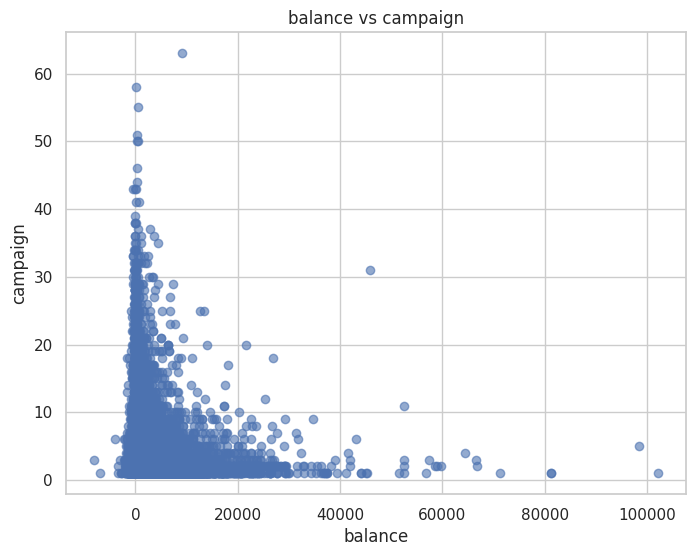

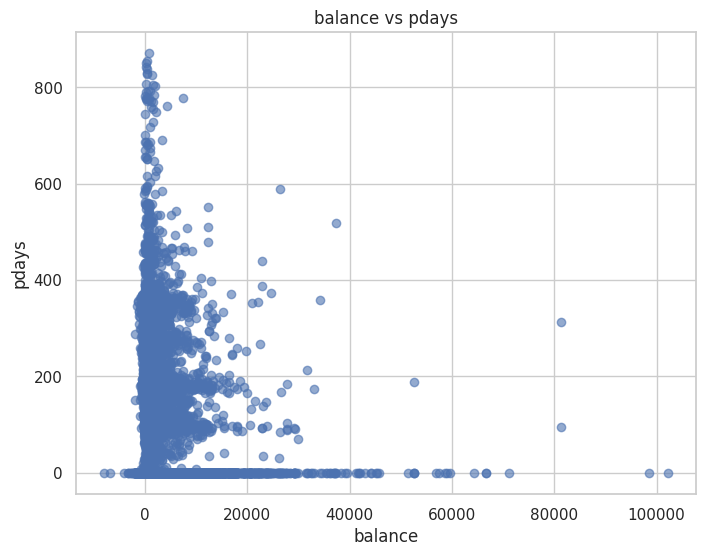

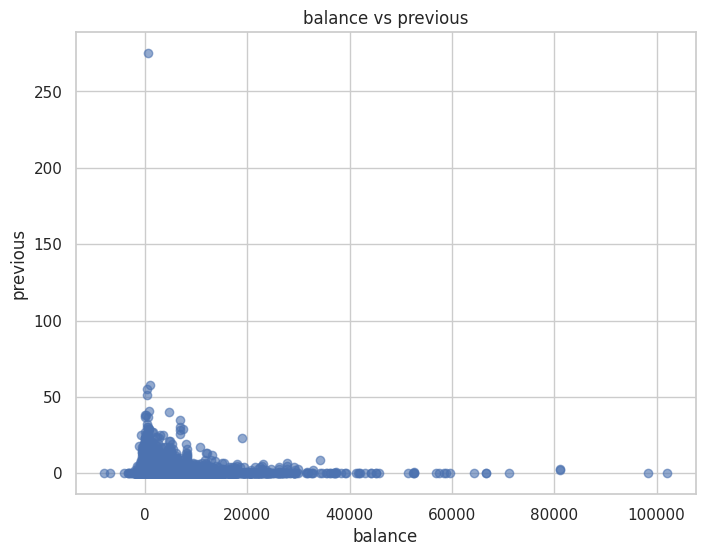

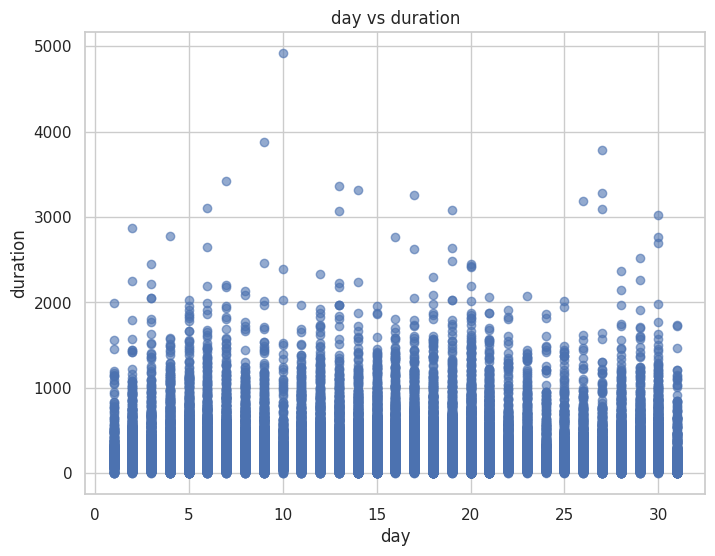

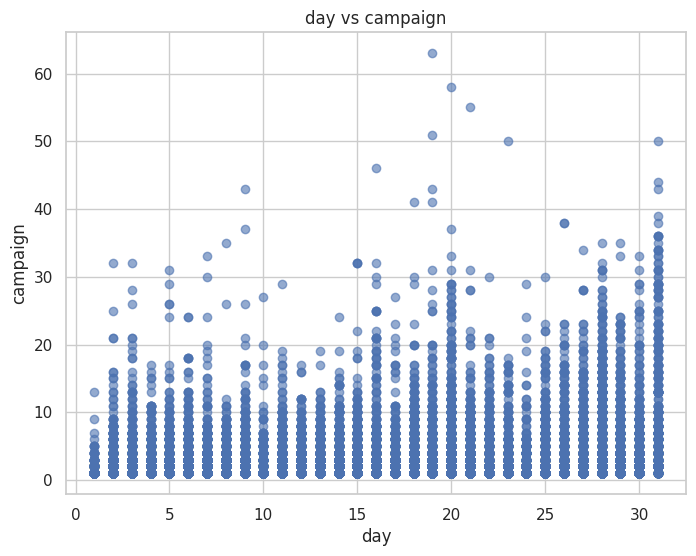

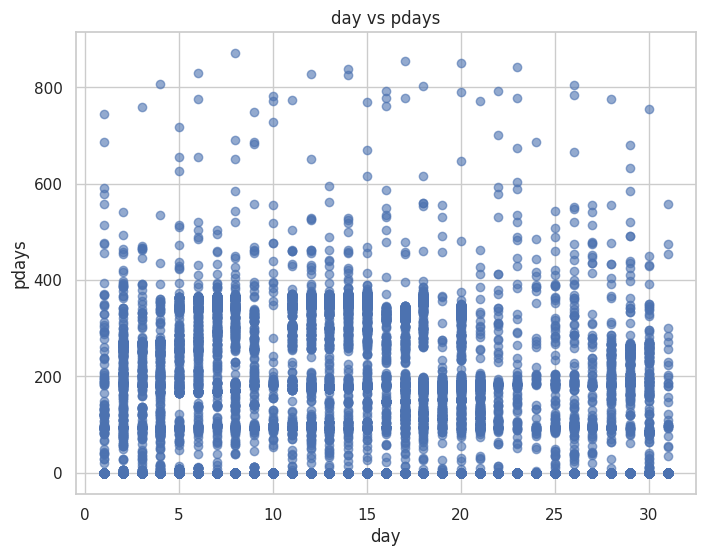

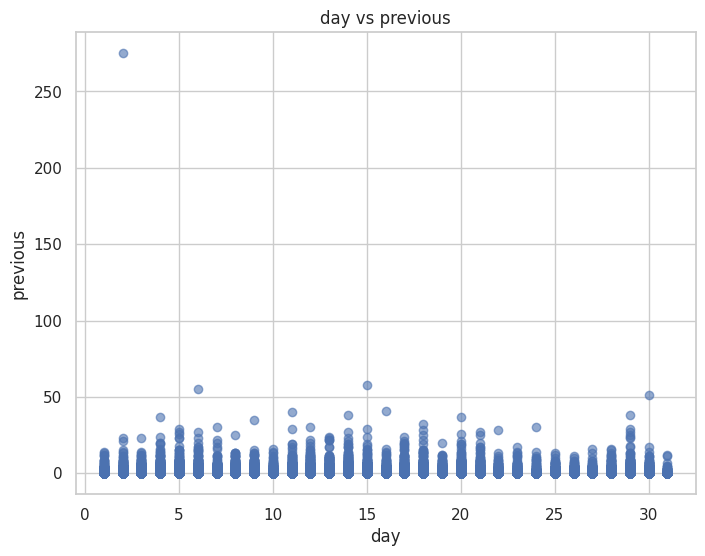

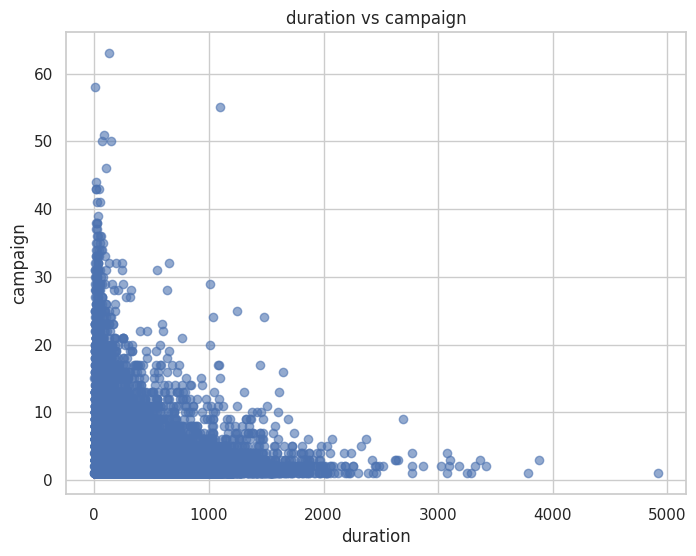

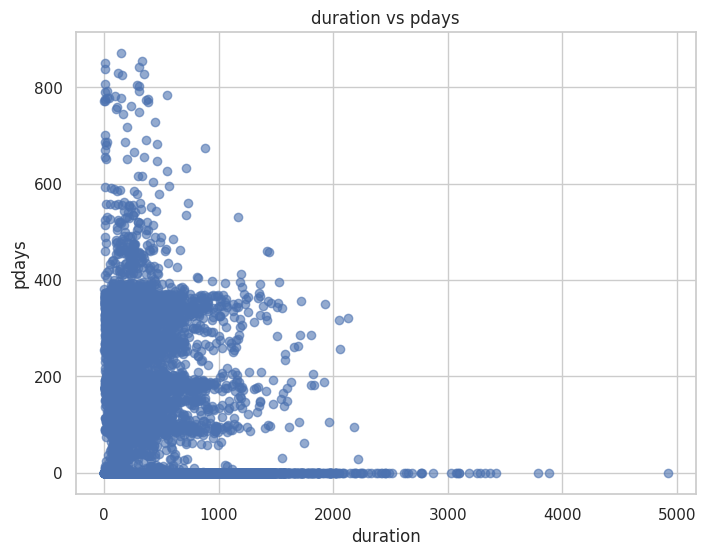

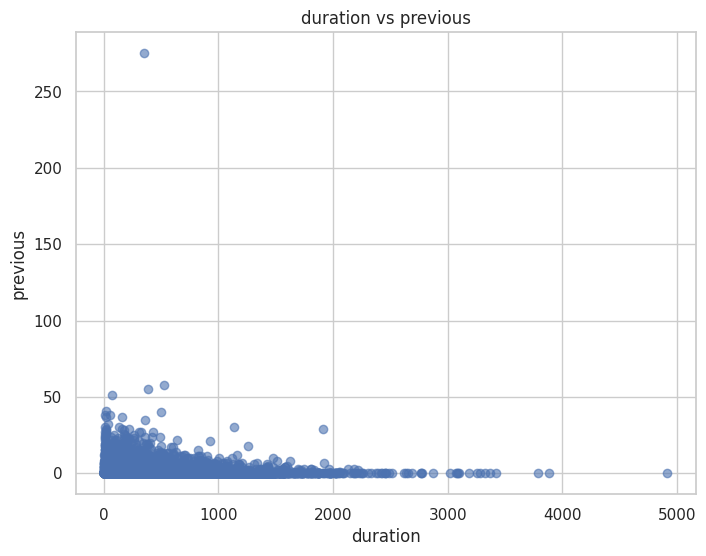

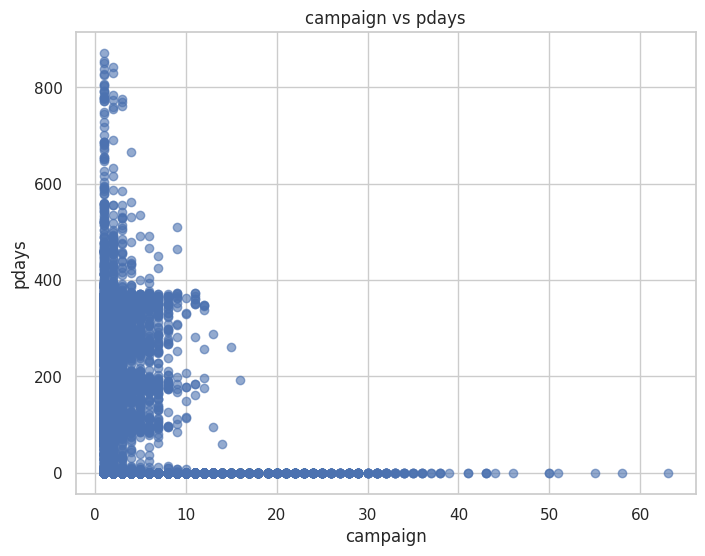

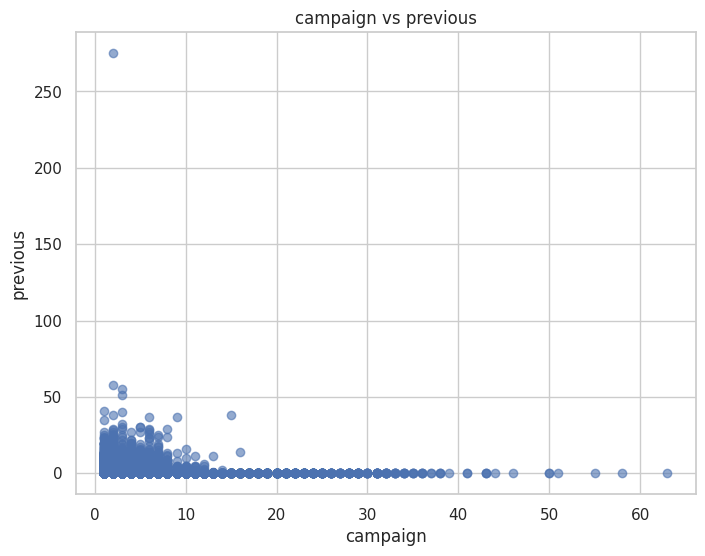

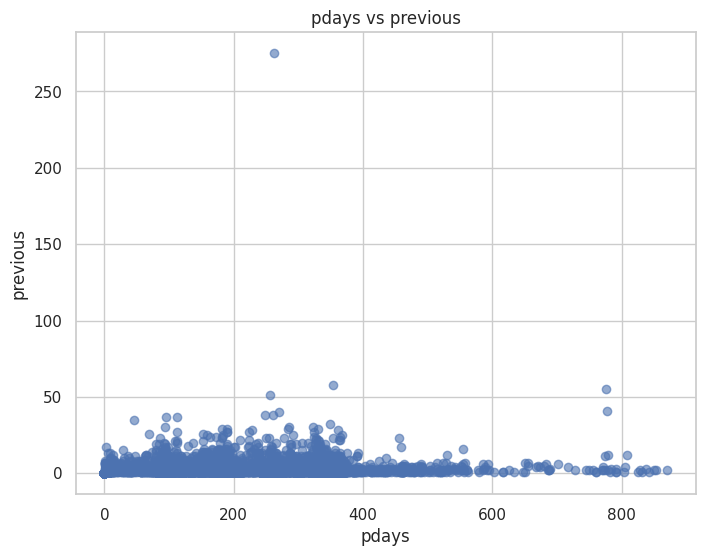

In [15]:
# Scatter plots between numeric variables
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_columns[i]], df[numeric_columns[j]], alpha=0.6)
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.title(f'{numeric_columns[i]} vs {numeric_columns[j]}')
        plt.show()

2.3 Multivariate Analysis

2.3.1 Cross tabulation for numerical variables

marital        divorced  married  single
job                                     
admin.              750     2693    1728
blue-collar         750     6968    2014
entrepreneur        179     1070     238
housemaid           184      912     144
management         1111     5400    2947
retired             425     1731     108
self-employed       140      993     446
services            549     2407    1198
student               6       54     878
technician          925     4052    2620
unemployed          171      731     401
unknown              17      203      68


<Figure size 1200x600 with 0 Axes>

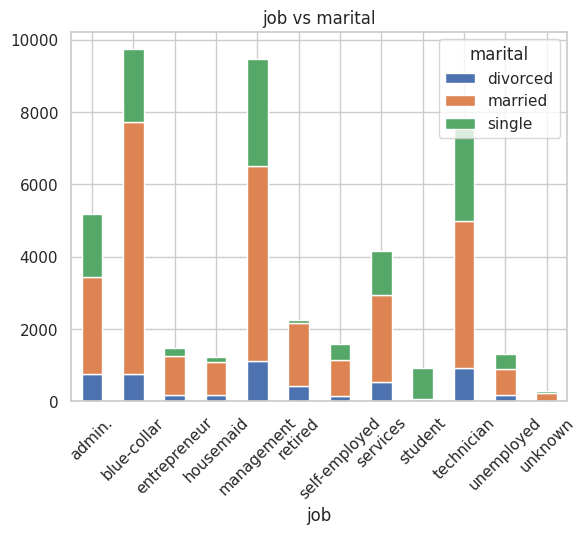

In [16]:
if len(categorical_columns) >= 2:
    crosstab = pd.crosstab(df[categorical_columns[0]], df[categorical_columns[1]])
    print(crosstab)

    # Stacked bar plot
    plt.figure(figsize=(12, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{categorical_columns[0]} vs {categorical_columns[1]}')
    plt.xticks(rotation=45)
    plt.show()

2.3.2 Numerical vs categorical analysis

               count       mean  median        std
job                                               
admin.          5171  39.289886    38.0   9.365483
blue-collar     9732  40.044081    39.0   9.025888
entrepreneur    1487  42.190989    41.0   9.114486
housemaid       1240  46.415323    47.0  10.477275
management      9458  40.449567    38.0   9.383415
retired         2264  61.626767    59.0   9.535329
self-employed   1579  40.484484    39.0   9.656075
services        4154  38.740250    37.0   9.041371
student          938  26.542644    26.0   4.842536
technician      7597  39.314598    37.0   8.939944
unemployed      1303  40.961627    40.0   9.777010
unknown          288  47.593750    47.0  10.775095


<Figure size 1000x600 with 0 Axes>

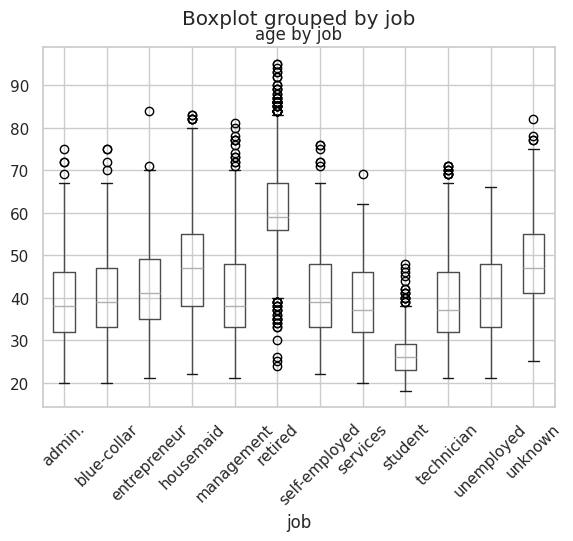

In [17]:
# Group statistics: numeric variable by categorical
if numeric_columns and categorical_columns:
    grouped_stats = df.groupby(categorical_columns[0])[numeric_columns[0]].agg([
        'count', 'mean', 'median', 'std'
    ])
    print(grouped_stats)

    # Box plot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=numeric_columns[0], by=categorical_columns[0])
    plt.title(f'{numeric_columns[0]} by {categorical_columns[0]}')
    plt.xticks(rotation=45)
    plt.show()